# Statistics & Public Health 1: Cleaning and EDA
#### Submitted by: Roman Kovalchuk


## Table of Contents:
* [Introduction](#Introduction)
* [Data dictionary](#Data-dictionary)
* [Importing Data](#Importing-Data)
* [Part 1: Basic Data Wrangling](#data-wrang)
* [Checking the shape of the DataFrame](#Checking-Shape)
* [Converting the Date to DateTime format](#converting)
* [Analysing Categorical Variables](#categorical)
* [Analysing Numerical Variables](#numerical)
* [Removing Duplicate Columns](#duplicate)
* [Dealing with null values](#null)
* [Checking for duplicate rows](#rows)
* [Part 2: Basic EDA](#EDA)
* [Exploring the relationship between mosquito number and date](#date)
* [Part 3: Advanced EDA](#EDA2)
* [Looking closer at trap type and number of mosquitoes caught](#caught)
* [Visualizing number of mosquitoes caught by address block](#block)
* [Conclusion](#conclusion)



## Introduction<a class="anchor" id="Introduction"></a>

In this notebook we will be analysing West Nile Virus (WNV) prevalence in Chicago, Illinois based on a number of traps that are placed in various neighbourhoods around the city. By looking closer at captured mosquitoes, we are able to discover patterns and trends in the spread of WNV around the city.

The data is from years 2007 - 2019.

## Data dictionary<a id="Data dictionary"></a>

The dataset contains the following columns:

- Year - Year that the WNV test is performed
- Week - Week that the WNV test is performed
- Address Block	- Address of the location of trap.
- Block	- Block number of address
- Trap - ID of the trap 
- Trap type - Type of trap
- Date - Date and time that the WNV test is performed. 
- Mosquito number - Number of mosquitoes caught in this trap 
- Mosquito ID - Id for Mosquito species
- WNV Present - Whether West Nile Virus was present in these mosquitos
- Species - Mosquito species
- Lat - Latitude of trap
- Lon - Longitude of trap

Notes:
- *Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.*

- *Not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.*

- *These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.*	


## Importing Data<a id="Importing-Data"></a>

First, we wil import the libraries that we will be using:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the csv file into jupyter notebook and saving it as raw_data
raw_data = pd.read_csv('data/mosquito_data.csv')

Let's check that everything went through correctly:

In [3]:
#checking the first 5 entires in the dataset
raw_data.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [4]:
#checking the last 5 entries
raw_data.tail()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758
18494,2015,33,100XX W OHARE AIRPORT,100,T902,GRAVID,2015-08-20 00:08:00,6,Res,positive,CULEX RESTUANS,NaN,NaN


Before we begin analyzing the data, let's see when the first and last entries were recorded.

In [5]:
earliest = raw_data.sort_values(by='Date', ascending=True)
latest = raw_data.sort_values(by='Date', ascending=False)

In [6]:
earliest.head()


,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
15483,2007,21,5XX N STREETER DR,5,T129,GRAVID,2007-05-29 00:05:00,2,Res,negative,CULEX RESTUANS,41.891513,-87.609785
15479,2007,21,25XX W GRAND AVE,25,T046,CDC,2007-05-29 00:05:00,1,Res,negative,CULEX RESTUANS,41.892220,-87.691698
15480,2007,21,2XX W 89TH ST,2,T096,CDC,2007-05-29 00:05:00,1,Pip,negative,CULEX PIPIENS,41.732428,-87.631056
15481,2007,21,15XX W WEBSTER AVE,15,T045,GRAVID,2007-05-29 00:05:00,2,Res,negative,CULEX RESTUANS,41.921705,-87.666963
15482,2007,21,22XX W 113TH ST,22,T087,GRAVID,2007-05-29 00:05:00,1,Res,negative,CULEX RESTUANS,41.688193,-87.676873


In [7]:
latest.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
33,2019,39,25XX S MILLARD AVE,25,T152,GRAVID,2019-09-26 00:09:00,4,Res,negative,CULEX RESTUANS,41.845715,-87.715899
24,2019,39,20XX N DOMINICK ST,20,T240,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.918676,-87.664374
25,2019,39,1XX N CENTRAL PARK DR,1,T030B,SENTINEL,2019-09-26 00:09:00,4,Res,negative,CULEX RESTUANS,41.883711,-87.716092
26,2019,39,17XX W 95TH ST,17,T094,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.721288,-87.665236


The earliest entry was on May 29/2007 and the last on Septmeber 26/2019. This means the data was collected over a 12 year time frame and will give us a chance to better see how numbers of captured mosquitoes may have differed over the years.

## Part 1: Basic Data Wrangling<a id="data-wrang"></a>

### Checking the shape of the DataFrame<a id="Checking-Shape"></a>

Now that we have the data loaded in our notebook, let's take a look at the shape of the DataFrame:

In [8]:
# Q1.1 What is the shape of the DataFrame?

# Analyzing the shape of the DataFrame
raw_data.shape

(18495, 13)

In [9]:
print(f'There are {raw_data.shape[0]} rows and {raw_data.shape[1]} columns in this dataset')

There are 18495 rows and 13 columns in this dataset


Now let's check the default data types set by pandas:

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


We have 6 numerical categories and 7 categories with text. The numerical objects have `int64` and `float64` assigned to them and the categorical are `object`'s.


### Converting `Date` to datetime format<a id="converting"></a>

The `Date` column is set to `object` so we can convert it to `datetime` format.

In [11]:
# Q1.2 Convert the 'Date' column to have a datetime format.

# Converting the date column into datetime format
raw_data['Date']= pd.to_datetime(raw_data['Date'])

In [12]:
#checking whether the conversion was successful

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             18495 non-null  int64         
 1   Week             18495 non-null  int64         
 2   Address Block    18495 non-null  object        
 3   Block            18495 non-null  int64         
 4   Trap             18495 non-null  object        
 5   Trap type        18495 non-null  object        
 6   Date             18495 non-null  datetime64[ns]
 7   Mosquito number  18495 non-null  int64         
 8   Mosquito ID      18495 non-null  object        
 9   WNV Present      18495 non-null  object        
 10  Species          18495 non-null  object        
 11  Lat              15571 non-null  float64       
 12  Lon              15571 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 1.8+ MB


Looks like it worked. Our `Date` data type is now `datetime64[ns]`

Next, let's explore some of these Categories, but first we need to make our graphs look pretty.

In [13]:
#changing the style of the plot

plt.style.use('ggplot')

### Analysing categorical variables<a id="categorical"></a>

Two categorical variables in teh dataset are Trap Type and Species.

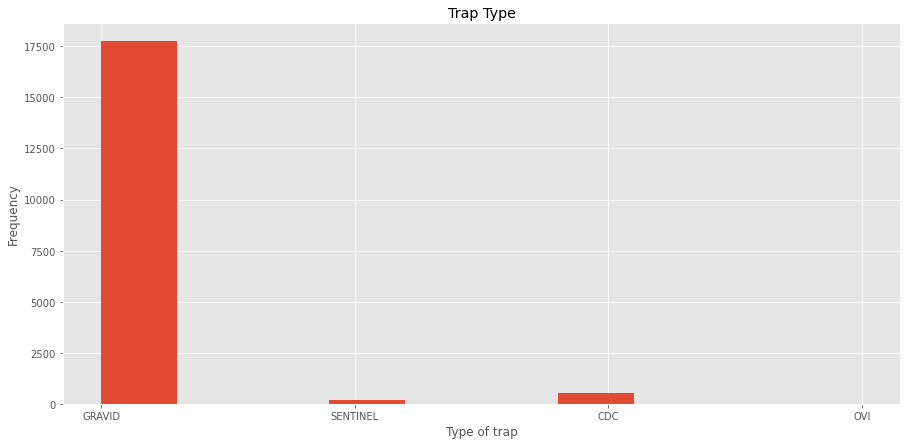

GRAVID      17741
CDC           544
SENTINEL      209
OVI             1
Name: Trap type, dtype: int64

In [14]:
# Q1.3 Pick two numeric and two categorical columns: What data they are storing? How are they distributed?

# Creating the plot size
plt.subplots(figsize=(15, 7))

# Plotting the histagram
plt.hist(raw_data['Trap type'])

# Creating axis labels and title
plt.xlabel('Type of trap')
plt.ylabel('Frequency')
plt.title('Trap Type')

#Showing the plot
plt.show()

# Displaying value counts of each type of trap
raw_data["Trap type"].value_counts()

The `Trap type` category is storing the type of trap that was use to capture the mosquitoes. The most popular trap type is "Gravid" which was used 17,741 times followed by CDC with 544 and Sentinel with 209. The OVI trap was used 1 time. We will look closely at `Trap type` later in the analysis. 

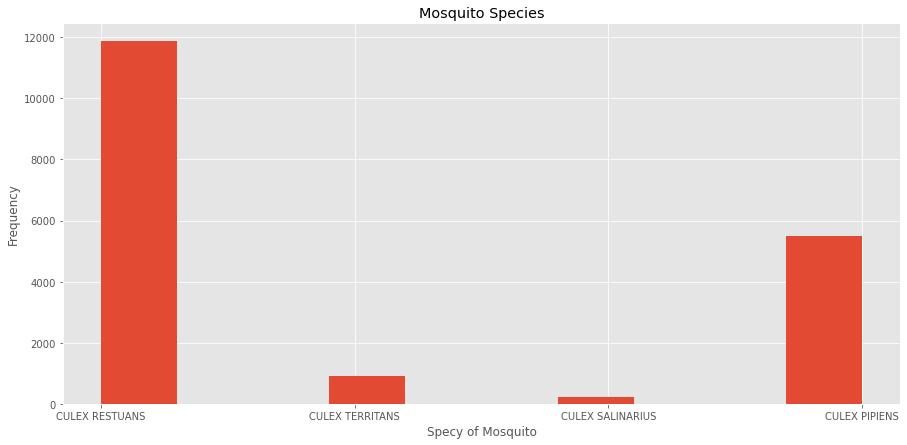

CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: Species, dtype: int64

In [15]:
# Creating the plot size
plt.subplots(figsize=(15, 7))

# Plotting the histogram
plt.hist(raw_data['Species'])

# Creating the axis labels and title
plt.xlabel('Specy of Mosquito')
plt.ylabel('Frequency')
plt.title('Mosquito Species')

# Showing the plot
plt.show()

# Displaying value counts of each species
raw_data["Species"].value_counts()

The "Species" category contains the species of mosquito that were capture in the traps. The two Mosquito types that seem to dominate Chicago are "Culex Restuans" with 11,866 instances and "Culex Pipiens" with 5,486. The other two species are "Culex Territans" with 917 and "Culex Salinarius" at 226 instances.

Now let's take a closer look at two numerical variables, "Mosquito number" and "Week".

### Analysing numerical variables<a id="numerical"></a>

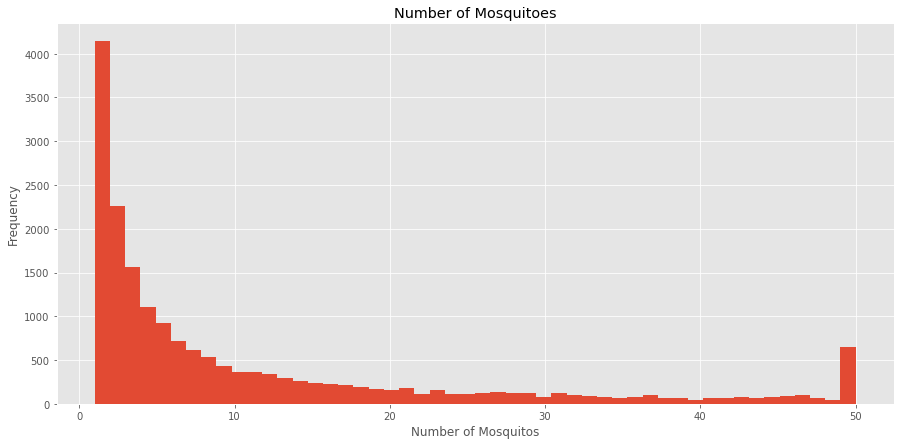

1     4141
2     2263
3     1564
4     1105
5      918
6      722
50     647
7      610
8      536
9      437
10     366
11     362
12     343
13     293
14     256
15     239
16     225
17     211
18     189
21     182
19     166
23     153
20     152
27     136
26     129
31     128
29     127
28     118
24     116
25     116
22     115
32     103
47      97
37      95
46      92
33      91
43      81
36      81
34      80
45      76
30      75
39      71
44      70
35      67
48      65
41      65
42      63
38      63
40      49
49      46
Name: Mosquito number, dtype: int64

In [16]:
# Creating plot size
plt.subplots(figsize=(15, 7))

# Plotting the histogram
plt.hist(raw_data['Mosquito number'], bins=50)

# Creating the axes labels and title
plt.xlabel('Number of Mosquitos')
plt.ylabel('Frequency')
plt.title("Number of Mosquitoes")

# Showing the plot
plt.show()

# Displaying value counts of mosquito numbers
raw_data["Mosquito number"].value_counts()

The "Mosquito number" category represents the number of mosquitoes caught in the trap. The distribution is right skewed with a slight bump at 50. It should be noted that according to the category description, these test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50. This leads to a slight bump at 50 and means that there may be rows in the earlier categories making it seem like traps are capturing less mosquitoes, when they are the following rows following 50.

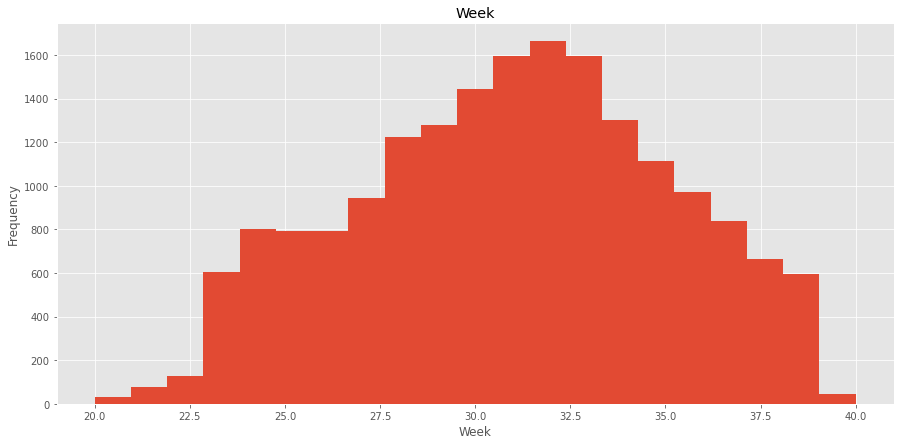

32    1662
31    1596
33    1595
30    1442
34    1300
29    1277
28    1223
35    1113
36     972
27     946
37     840
24     802
26     792
25     791
38     664
23     603
39     594
22     129
21      78
40      47
20      29
Name: Week, dtype: int64

In [17]:
# Creating the plot size
plt.subplots(figsize=(15, 7))

# Plotting the histogram
plt.hist(raw_data['Week'], bins= 21)

# Creating the axes labels and title
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.title('Week')
plt.show()

# Displaying value counts of each type of trap
raw_data["Week"].value_counts(sort=True)

The week category represents the week number that the WNV test was performed. It ranges from week 20 to 40, which is usually the second week of May to the first week of October. The majority of these tests were performed during week 32 at the start of August. 

Most of this data represents tests that were performed during summer between weeks 29 - 35. This is not surprising as mosquito population is at its peak during the summer months and also correlates with when WNV is most prevalent. It is clear that the majority of the tests were completed in the summer and trailed off in the fall.

 ### Removing duplicate columns<a id="duplicate"></a>

Some of our columns contain duplicates and present repetitive information in our data.
These columns are: 
- Year and Date 
- Mosquito ID and Species
- Address Block and Block

The `Year` information is contained in the `Date` columns so we will remove the `Year` column in order to reduce duplicate info:




In [18]:
#Q1.4 Are there any columns that contain duplicate information? If so, remove the redundant columns.

#deleting the year column
del raw_data['Year']

Next let's delete the `Mosquito ID` column as it already exists under `Species`:

In [19]:
#deleting Mosquito ID column
del raw_data['Mosquito ID']

Lastly, we can delete the `Block` column as the info is included in `Address Block`:

In [20]:
#deleting the Block column
del raw_data["Block"]

Let's perform a sanity check to make sure that everything worked according to plan:

In [21]:
raw_data.head()

,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
1,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049


We've reduced our dataset from 13 columns to 10 and removed repetitive information.


### Dealing with null values<a id="null"></a>

Next, let's check for any null values:

In [22]:
#Q1.5 Are there any null values in the dataframe? If so, deal with them appropriately.

#Checking for null values
raw_data.isnull().sum(axis=0)

Week                  0
Address Block         0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
WNV Present           0
Species               0
Lat                2924
Lon                2924
dtype: int64

Now let's check the percentage of the null values:

In [23]:
#checking percentage of null values
raw_data.isna().sum(axis=0) / raw_data.shape[0]*100

Week                0.000000
Address Block       0.000000
Trap                0.000000
Trap type           0.000000
Date                0.000000
Mosquito number     0.000000
WNV Present         0.000000
Species             0.000000
Lat                15.809678
Lon                15.809678
dtype: float64

Null values seem to represent 15% of the dataset and they're all in the longitude (`Lon`) and latitude (`Lat`) columns. Since these columns portray the location of the trap site, we can fill them in by using https://www.coordinatesfinder.com/. We have the address in the `Address Block` column so we can match the address to the right coordinates and fill in our data. First let's check which columns contain `null` values:

In [24]:
#Displaying all rows that contain null values

pd.options.display.max_rows = None
raw_data[raw_data.isnull().any(axis=1)]

,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
0,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
44,38,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-19 00:09:00,3,negative,CULEX RESTUANS,NaN,NaN
55,38,100XX W OHARE AIRPORT,T905,GRAVID,2019-09-19 00:09:00,2,negative,CULEX TERRITANS,NaN,NaN
57,38,100XX W OHARE AIRPORT,T905,GRAVID,2019-09-19 00:09:00,4,negative,CULEX RESTUANS,NaN,NaN
93,37,100XX W OHARE AIRPORT,T905,GRAVID,2019-09-12 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
97,37,4XX W 127TH,T135,GRAVID,2019-09-12 00:09:00,35,negative,CULEX RESTUANS,NaN,NaN
101,37,100XX W OHARE AIRPORT,T901,GRAVID,2019-09-12 00:09:00,2,negative,CULEX RESTUANS,NaN,NaN
129,37,100XX W OHARE AIRPORT,T912,GRAVID,2019-09-12 00:09:00,3,negative,CULEX RESTUANS,NaN,NaN
130,37,4XX W 127TH,T135,GRAVID,2019-09-12 00:09:00,8,negative,CULEX PIPIENS,NaN,NaN
132,37,100XX W OHARE AIRPORT,T905,GRAVID,2019-09-12 00:09:00,1,negative,CULEX TERRITANS,NaN,NaN


Using the addresses contained in the `Address Block` category, we can write a loop to match the latitude and longitude to the correct address.

In [25]:
#Creating a for loop to match the longitude and latitude values to the address
for index, row in raw_data.iterrows():
#iterating over addresses with missing values and filling them in with appropriate values
    if row['Address Block'] == "100XX W OHARE AIRPORT":
        raw_data.loc[index, 'Lat'] = 41.9803
        raw_data.loc[index, "Lon"] = -87.9090
    elif row['Address Block'] == "100XX W OHARE":
        raw_data.loc[index, 'Lat'] = 41.9803
        raw_data.loc[index, "Lon"] = -87.9090  
    elif row['Address Block'] == "4XX W 127TH":
        raw_data.loc[index, 'Lat'] = 41.6637
        raw_data.loc[index, "Lon"] = -87.6239   
    elif row['Address Block'] == "81XX S ASHLAND":
        raw_data.loc[index, 'Lat'] = 41.8807
        raw_data.loc[index, "Lon"] = -87.6665
    elif row['Address Block'] == "79XX S CHICAGO":
        raw_data.loc[index, 'Lat'] = 41.7496
        raw_data.loc[index, "Lon"] = -87.7161
    elif row['Address Block'] == "65XX N OAK PARK AVE":
        raw_data.loc[index, 'Lat'] = 41.9751
        raw_data.loc[index, "Lon"] = -87.7963    
    elif row['Address Block'] == "98XX S AVENUE G":
        raw_data.loc[index, 'Lat'] = 41.7092
        raw_data.loc[index, "Lon"] = -87.5315
    elif row['Address Block'] == "115XX S AVENUE L":
        raw_data.loc[index, 'Lat'] = 41.7119
        raw_data.loc[index, "Lon"] = -87.5364
    elif row['Address Block'] == "30XX S HOYNE":
        raw_data.loc[index, 'Lat'] = 41.8810
        raw_data.loc[index, "Lon"] = -87.6791        
    elif row['Address Block'] == "43XX N ASHLAND":
        raw_data.loc[index, 'Lat'] = 41.8826
        raw_data.loc[index, "Lon"] = -87.6670
        
        

Let's check if we have any more null values

In [26]:
raw_data.isnull().sum(axis=0)

Week               0
Address Block      0
Trap               0
Trap type          0
Date               0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

All of our null values have ben sorted. 



### Checking for duplicate rows<a id="rows"></a>

Lastly, let's check for any duplicate values.

In [27]:
# Checking for duplicates
duplicates = raw_data.duplicated()
duplicate_counts = duplicates.value_counts()
print(duplicate_counts)

False    17837
True       658
dtype: int64


Looks like we have 658 values which are duplicates, however it is unclear if they are clear duplicates since the `Date` column is "the date and time that the WNV test is performed". Since the mosquito count caps at 50 before starting a new row, it is unclear whether the duplicate values are genuine duplicates or values that happened to be tested at the same time. 

For this reason, we will not be removing any duplicates and begin our exploratory data analysis.

Let's save our data to a new variable.

In [28]:
#Saving a copy of the 'raw_data' variable to 'mosquito_data' to begin performing exploratory data anlysis
mosquito_data = raw_data.copy()

## Part 2 - Basic EDA<a id="EDA"></a>

### Exploring the relationship between mosquito number and date<a id="date"></a>

In [29]:
#Q2.1 Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

#Grouping and summing Date and Mosquito number categories
date_mosquito = mosquito_data.groupby(['Date'])['Mosquito number'].sum()

#viewing mosquito numbers logged by date and sorting by the highest values.
#2016 seems to have the most mosquitoes logged
print(date_mosquito.sort_values(ascending=False))

Date
2016-08-04 00:08:00    6151
2016-07-27 00:07:00    6142
2016-08-11 00:08:00    5721
2014-08-21 00:08:00    4005
2014-07-31 00:07:00    3657
2007-08-15 00:08:00    3585
2014-08-28 00:08:00    3347
2014-08-14 00:08:00    3233
2013-09-06 00:09:00    3194
2013-07-19 00:07:00    2868
2016-08-18 00:08:00    2764
2013-07-12 00:07:00    2732
2014-08-07 00:08:00    2623
2016-09-01 00:09:00    2365
2013-08-29 00:08:00    2254
2014-07-10 00:07:00    2208
2014-09-05 00:09:00    2118
2013-09-12 00:09:00    2108
2016-09-08 00:09:00    2042
2007-08-07 00:08:00    1941
2013-08-08 00:08:00    1921
2007-08-22 00:08:00    1867
2007-08-21 00:08:00    1862
2018-08-09 00:08:00    1851
2012-07-27 00:07:00    1847
2013-08-15 00:08:00    1844
2018-08-16 00:08:00    1812
2018-07-26 00:07:00    1777
2012-08-03 00:08:00    1749
2015-08-06 00:08:00    1730
2017-08-17 00:08:00    1686
2018-08-02 00:08:00    1682
2018-06-21 00:06:00    1646
2007-08-24 00:08:00    1440
2018-07-19 00:07:00    1432
2013-08-22 00:0

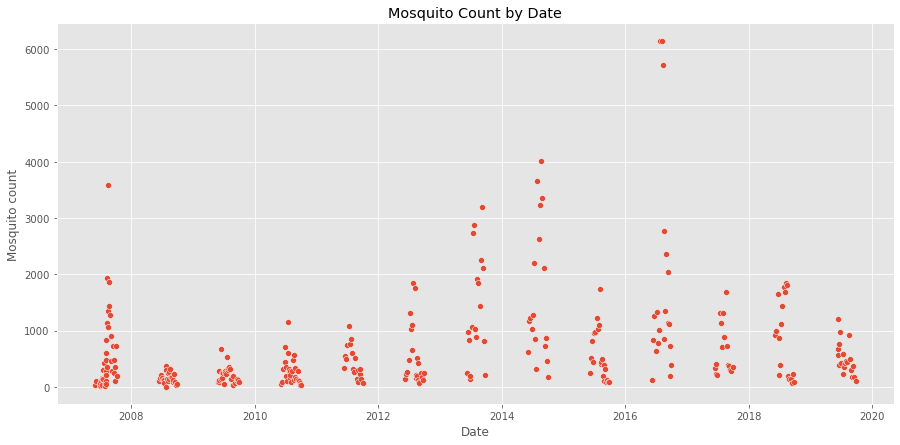

In [30]:
# Creating the plot size
plt.subplots(figsize=(15, 7))

# Plotting the scatter plot
sns.scatterplot(data=date_mosquito)

# Adding title and axis labels
plt.title("Mosquito Count by Date")
plt.xlabel("Date")
plt.ylabel("Mosquito count")

#Showing the plot
plt.show()

The above scatter plot represents the relationship between total number of mosquitoes and the date the WNV test was performed. From the plot we can see that the highest number of mosquitoes were logged in 2016, with 3 values exceeding 5,500. The next values logged were below 3,000. The values in 2016 were clear outliers compared to the rest of the years. The year 2014 also had a high number of mosquitoes, with 4 days logged between 3,000 and 4,000. 

The years with least mosquitoes tested were 2009 and 2010, with tested days never exceeding 1,000 mosquitoes and most values below the 500 count. 2007 also had an outlier, with a value in the 3,600 range and the next ones coming in below 2,000. 

The plot seems to be showing an upward trend in mosquito counts starting from the year 2009 to 2014. It drops slightly at 2015 and jumps to the highest year in 2016.



## Part 3 - Advanced EDA<a id="EDA2"></a>

### Analysing the relationship between WNV prevelance and mosquito species<a id="species"></a>

Now let's explore the relationship between mosquito species and West Nile Virus (WNV) Prevalence. The four types of mosquitoes in our dataset are "Culex Pipiens", "Culex Restuans", "Culex Salinarius", and "Culex Territans". The WNV prevalence column is a Boolean with "positive" and "negative" variables. We can visualize this relationship by using a stacked bar plot:

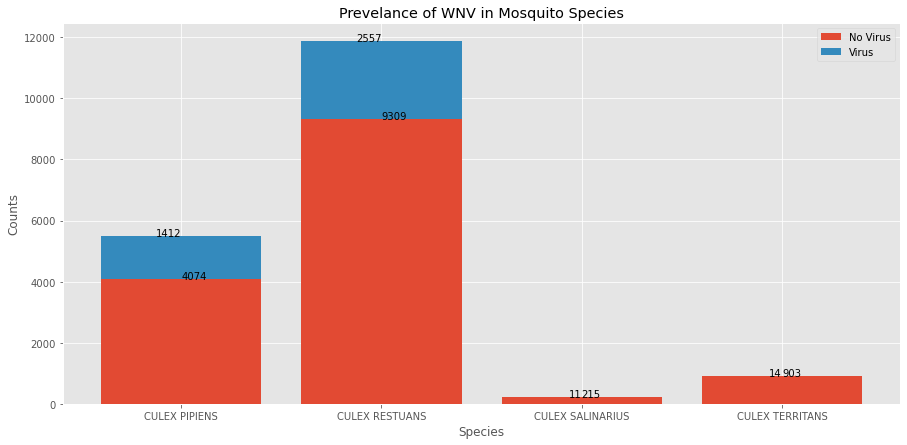

In [31]:
#Q3.1 Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

#Creating plot size
plt.subplots(figsize=(15, 7))

#Counting number of occurences of each species and virus prevelance combination
species_counts = mosquito_data.groupby(['Species', 'WNV Present']).size().reset_index(name='counts')

#Plotting a bar plot to show the relationship between species and virus prevalence
plt.bar(x=species_counts[species_counts['WNV Present'] == "negative"]['Species'], height=species_counts[species_counts['WNV Present'] == "negative"]['counts'], label='No Virus')
plt.bar(x=species_counts[species_counts['WNV Present'] == "positive"]['Species'], height=species_counts[species_counts['WNV Present'] == "positive"]['counts'], label='Virus', bottom=species_counts[species_counts['WNV Present'] == "negative"]['counts'])


# Annotating each bar with its negative count
for i in range(len(species_counts[species_counts['WNV Present'] == "negative"]['Species'])):
    negative_value = species_counts[species_counts['WNV Present'] == "negative"]['counts'].iloc[i]
    plt.text(x=i, y=negative_value + 1, s=negative_value, ha='left')

# Annotating each bar with its positive count
for i in range(len(species_counts[species_counts['WNV Present'] == "positive"]['Species'])):
    positive_value = species_counts[species_counts['WNV Present'] == "positive"]['counts'].iloc[i]
    total_value = species_counts[species_counts['WNV Present'] == "negative"]['counts'].iloc[i] + positive_value
    plt.text(x=i, y=total_value + 1, s=positive_value, ha='right')


#plotting title, axis labels, and legend
plt.title("Prevelance of WNV in Mosquito Species")
plt.xlabel('Species')
plt.ylabel('Counts')
plt.legend()

#showing the plot
plt.show()




From the plot above, we can see that the most prominent species is the Culex Restuans with 11,866 values, from which 9,309 were negative and 2,557 positive. The second species that was most prevalent with WNV was Culex Pipiens with 5,486 total results, 4,074 of which were negative and 1,412 positive. 

The next species was Culex Territans with 917 total tests, 903 of which were negative and only 14 positive and Culex Salinarius of which 226 tests were recorded with 215 negative and 11 positive.

Percentage wise, over 25% of Culex Pipiens tests returned positive followed by Culex Restuans, which had a 21% positivity rate. The other two species recorded a very low positivity rate, however there were not a lot of them tested. Culex Restuans is the species that carried the highest portion of the virus and should be the primary focus of the research team.

### Looking closer at trap type and number of mosquitos caught<a id="caught"></a>

Next, let's explore the relationship between the number of mosquitoes caught and trap type:

In [32]:
#Grouping and summing Date and Mosquito number categories
mosquito_trap = mosquito_data.groupby(['Trap type'])['Mosquito number'].sum()
print(mosquito_trap)

Trap type
CDC           9883
GRAVID      186206
OVI              1
SENTINEL      5134
Name: Mosquito number, dtype: int64


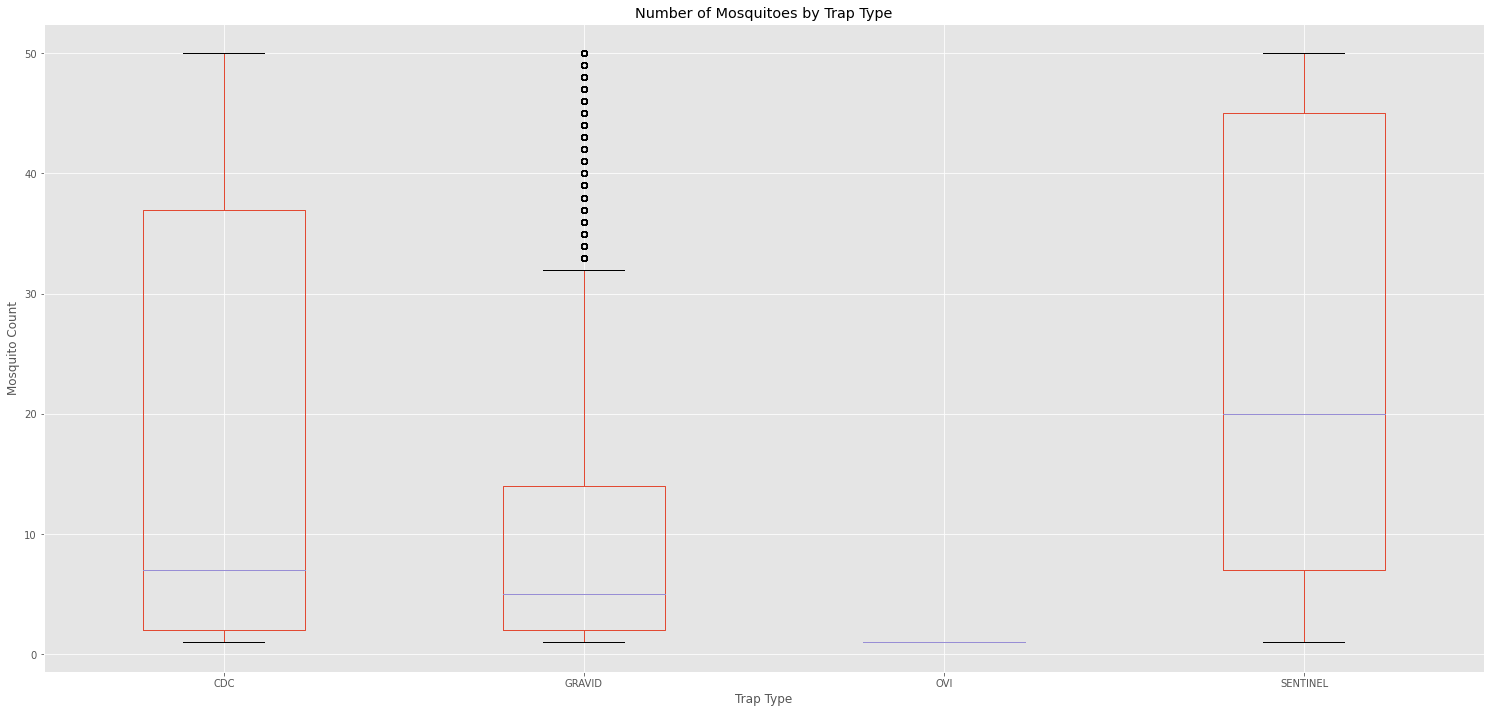

In [33]:
#Q3.2 Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.


#Creating plot size
fig, ax = plt.subplots(figsize=(25, 12))

#Plotting box plot
ax = mosquito_data.boxplot(column='Mosquito number', by='Trap type', ax=ax)

#Setting axis labels and title
plt.xlabel('Trap Type')
plt.ylabel('Mosquito Count')
plt.title("Number of Mosquitoes by Trap Type")

#Removing default title
ax.get_figure().suptitle("")

#Showing the plot
plt.show()




The above box plot represents the number of mosquitoes caught in each trap type. The box represents the interquartile range (IQR), which contains the middle 50% of the data, and the whiskers represent the range of the data (bottom whisker 25th percentile and upper 75th). The median of the data is also shown in the box plot as the violet line and the dots outside the plot are outliers.

As seen in the previous histogram comparing Trap types, Gravid is the most frequently used trap, capturing over 186,000 mosquitoes. Interestingly enough, we can see that the median number of mosquitoes captured was below the CDC and Sentinel trap. The median is the middle number in a sorted dataset, which in this case means that most mosquitoes recorded in the Gravid trap were below 8. However this can be an overflowing row from a previous recording that capped off at 50. This is why the y-axis caps at 50. Gravid also contains many visible outliers above the 32 ranges.

The median values for CDC and Gravid are quite similar, in the 6-8 ranges, while Sentinel's median is at 20. OVI has only captured 1 mosquito and that's where it's median is located. 

Looking at the IQR, Gravid has the least scattered data with 50% of it sitting in the 2-14 range. The CDC and Sentinel traps have higher spread than Gravid with CDC having 50% of its data in the 2-36 range and Sentinel 8-45. It's interesting to note that Gravid's upper whisker ends at 32 and is followed by numerous outliers while CDC's and Sentinel's extend straight to the top.

Lastly, from the shape of the plots we can tell that the CDC trap is right skewed with numbers of mosquitos recorded in the lower values. Gravid also exhibits a bit of a right skew while Sentinel is slightly more symmetric but still skewed to the right.

The box plots do a good job in comparing the values in each trap despite Gravid catching overwhelmingly more mosquitoes.

### Visualising number of mosquitos caught by address block<a id="block"></a>

Lastly, lets analyse mosquitos caught by `Address block`.

In [34]:
#Grouping number of mosquitoes caught by address block
address_count = mosquito_data.groupby(['Address Block'])['Mosquito number'].sum()

#Displaying and sorting the values in ascending order, showing most popular block's first
print(address_count.sort_values(ascending=False))

Address Block
100XX W OHARE AIRPORT                 33242
41XX N OAK PARK AVE                    9304
101XX S STONY ISLAND AVE               8117
70XX N MOSELLE AVE                     6618
52XX S KOLMAR AVE                      4974
127XX S DOTY AVE                       4822
1XX N CENTRAL PARK DR                  4671
91XX W HIGGINS RD                      4379
36XX N PITTSBURGH AVE                  4348
70XX W ARMITAGE AVE                    4289
58XX N WESTERN AVE                     4085
4XX W 127TH                            3753
67XX S KEDZIE AVE                      3269
24XX E 105TH ST                        3241
82XX S KOSTNER AVE                     3207
58XX N PULASKI RD                      3034
37XX E 118TH ST                        3015
4XX E 130TH ST                         3014
89XX S CARPENTER ST                    2919
71XX N HARLEM AVE                      2907
25XX W GRAND AVE                       2865
61XX N LEMONT AVE                      2840
5XX S CENTRAL AVE 

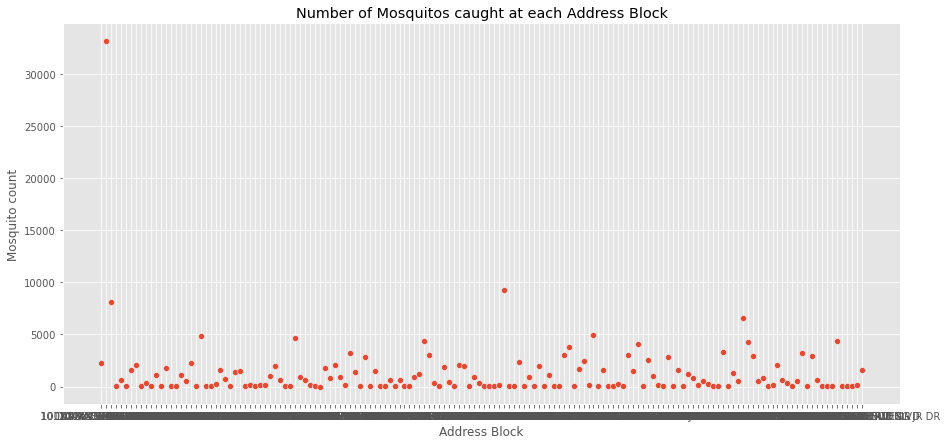

In [35]:
#Q3.3 Using an appropriate visual, come up with an additional insight of your choice.


#Creating plot size
plt.subplots(figsize=(15, 7))

# Plotting the scatter plot
sns.scatterplot(data=address_count)

# Adding title and axis labels
plt.title("Number of Mosquitos caught at each Address Block")
plt.xlabel("Address Block")
plt.ylabel("Mosquito count")


#Showing the plot
plt.show()

In [36]:
#Calculating and displaying the percentage of mosquito's captured at each address.

block_percentage = address_count / address_count.sum() *100
print(block_percentage.sort_values(ascending=False))

Address Block
100XX W OHARE AIRPORT                 16.519898
41XX N OAK PARK AVE                    4.623703
101XX S STONY ISLAND AVE               4.033813
70XX N MOSELLE AVE                     3.288872
52XX S KOLMAR AVE                      2.471872
127XX S DOTY AVE                       2.396334
1XX N CENTRAL PARK DR                  2.321294
91XX W HIGGINS RD                      2.176182
36XX N PITTSBURGH AVE                  2.160776
70XX W ARMITAGE AVE                    2.131455
58XX N WESTERN AVE                     2.030076
4XX W 127TH                            1.865086
67XX S KEDZIE AVE                      1.624558
24XX E 105TH ST                        1.610643
82XX S KOSTNER AVE                     1.593746
58XX N PULASKI RD                      1.507772
37XX E 118TH ST                        1.498330
4XX E 130TH ST                         1.497833
89XX S CARPENTER ST                    1.450622
71XX N HARLEM AVE                      1.444659
25XX W GRAND AVE          

Looking at the scatter plot above, we instantly notice one outlier floating high above the others. It belongs to the "100 W OHARE AIRPORT" location, which captured 33,242 mosquitoes, over 16% of the total. This was spot where researchers compiled the most data.  The next highest spot is "41 N OAK PARK AVE" which captured 9,304 mosquitoes (4.6%) and "101 S STONY ISLAND AVE" with 8,117 (4%). The other addresses represent < 3% of the data.

It's worth considering why such a high percentage of mosquitoes were captured by O'Hare airport. Was it because there were more traps present or a higher percentage of mosquitoes? Looking at a map of Chicago, we see that the airport wasn't near water where mosquitoes like to reside and breed, so it's possible that the researchers set more traps in its vicinity.


## Conclusion<a id="conclusion"></a>

Throughout this analysis we've wrangled with our data by removing unneeded categories, filling in null values, analysing multiple variables, as well as exploring relationships between them. 

We've learned that a majority of mosquitoes were caught by the Gravid trap and a high amount were captured by the airport. We've also observed that the Culex Restuans species is responsible for the majority of WNV cases and that most of the mosquitoes were captured between 2014 and 2016 during the summer months.

Though the data focuses on Chicago, it would be interesting to see whether similarities exist in more forested areas outside the city, such as Indiana Dunes National Park. It would also benefit comparing data with other large cities across USA and even parts of Canada. It would also be interesting to know if over another decade, the proportion of species carrying the virus would change and if new traps would be more effective at capturing mosquitoes. Though collecting and analysing data can seem tedious at times, it reveals patterns which unleash insights and help change the world for the better - one row at a time.